In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

In [9]:
image_dir = 'Dataset/test/'
gt_dir = 'Dataset/test_mask/'
unet_dir = 'UNET_predicted_masks/'
rcnn_dir = 'RCNN_predicted_masks/'
output_dir = 'comparison/'

In [ ]:

def load_tif(path):
    if not os.path.exists(path):
        print(f"Missing: {path}")
        return None
    img = tiff.imread(path)
    if img.ndim == 3 and img.shape[0] in [1, 3]:
        img = img.transpose(1, 2, 0)
    return img

def visualize_and_save(image_name, original, gt, unet, rcnn):
    plt.figure(figsize=(18, 5))
    titles = ['Original', 'Ground Truth', 'U-Net', 'Mask R-CNN']
    images = [original, gt, unet, rcnn]

    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.title(titles[i], fontsize=13)
        plt.xticks([]), plt.yticks([])
        img = images[i]
        if img is None:
            plt.text(0.5, 0.5, 'Missing', ha='center', va='center')
        elif img.ndim == 2:
            plt.imshow(img, cmap='gray')
        elif img.ndim == 3 and img.shape[2] == 1:
            plt.imshow(img.squeeze(), cmap='gray')
        else:
            plt.imshow(img)
    plt.suptitle(image_name, fontsize=14)
    plt.tight_layout()

    save_path = os.path.join(output_dir, f"{os.path.splitext(image_name)[0]}_comparison.png")
    plt.savefig(save_path, dpi=150)

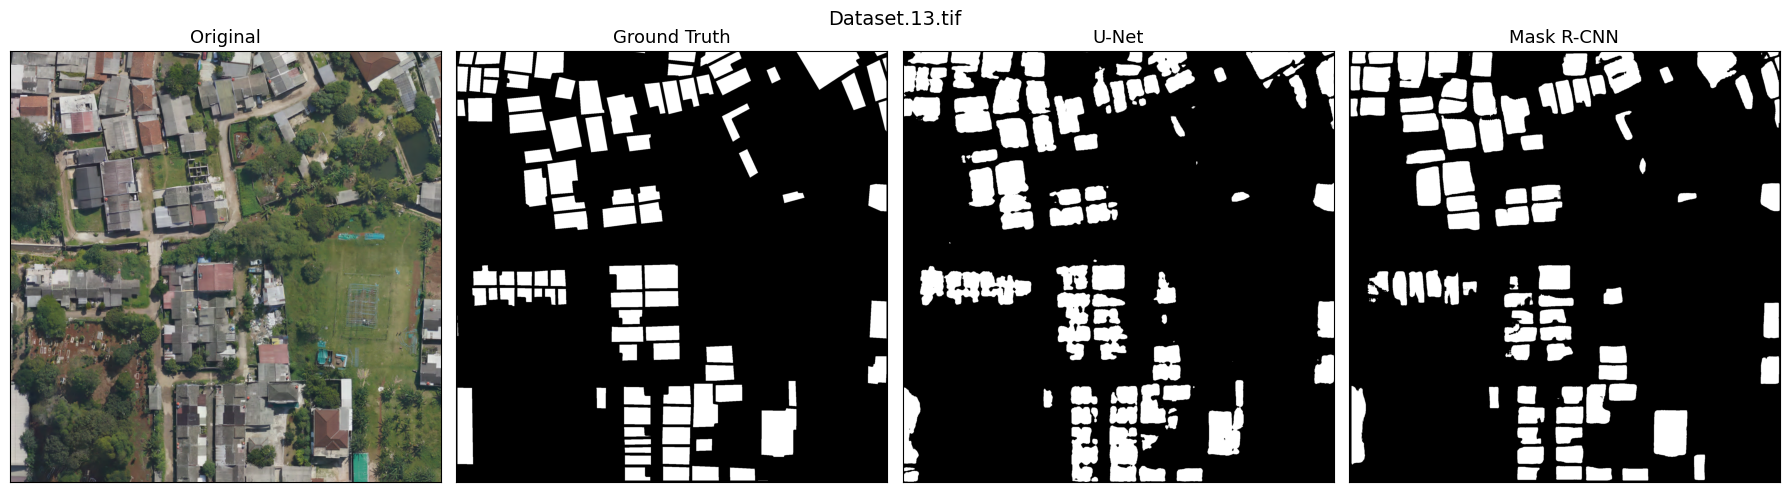

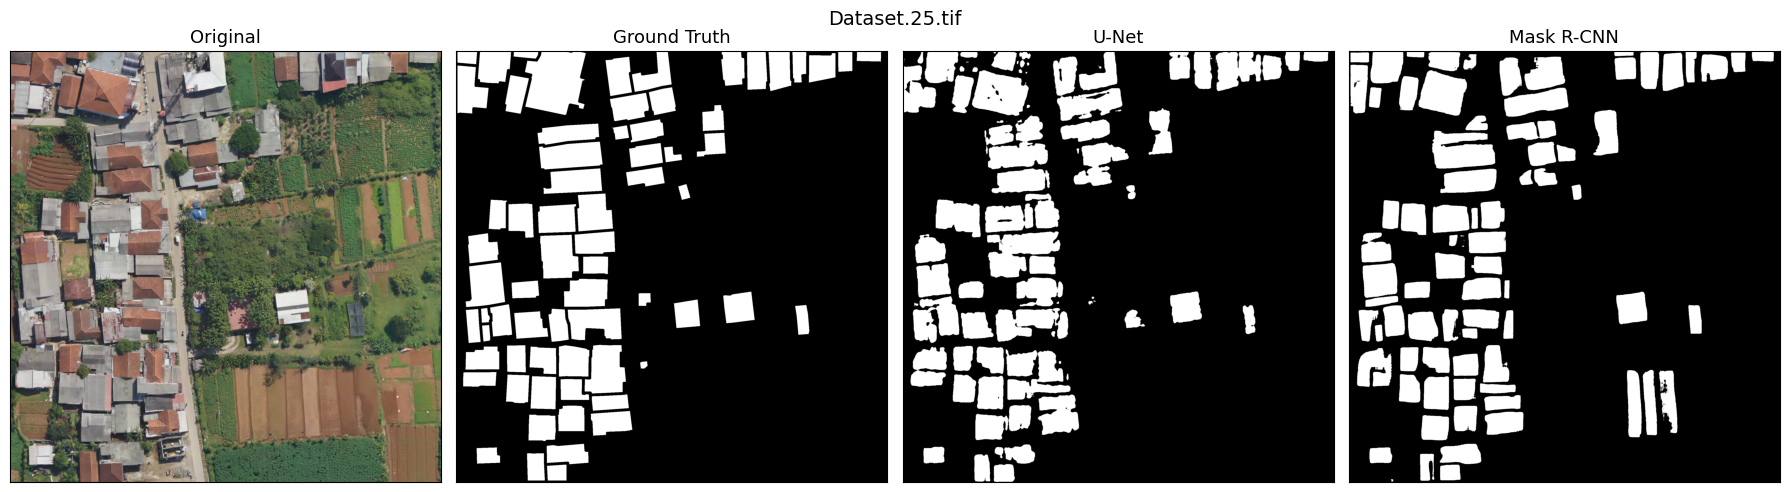

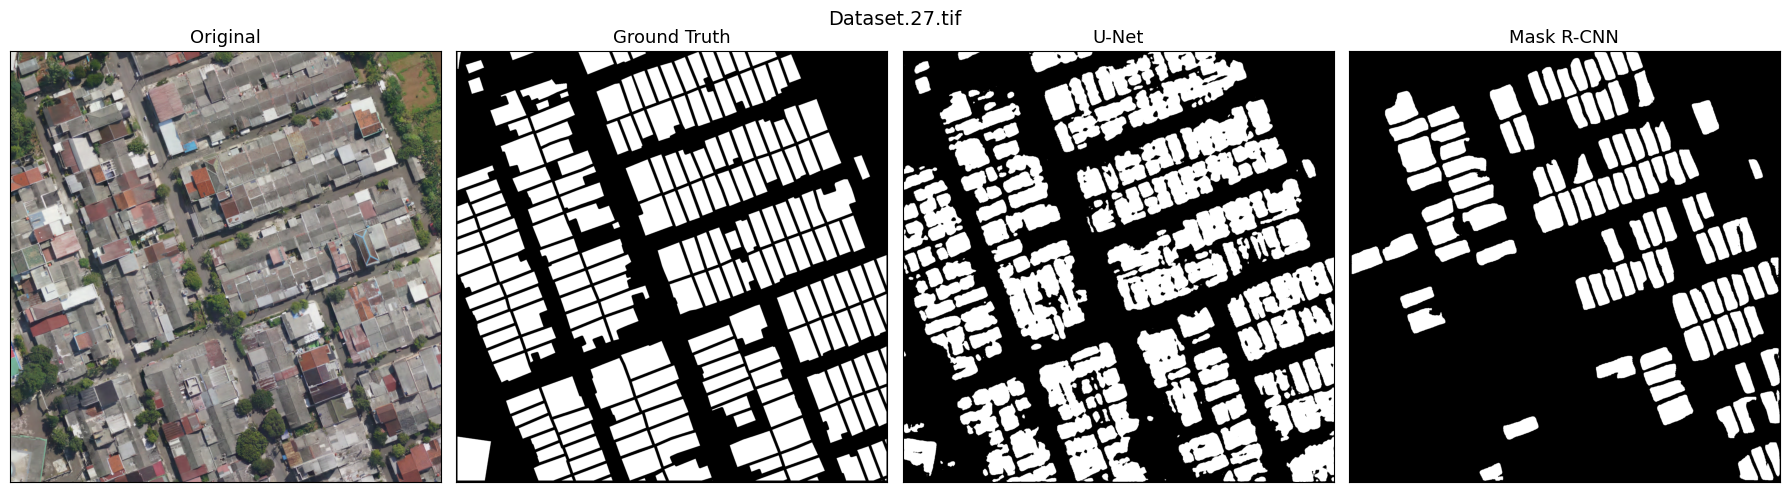

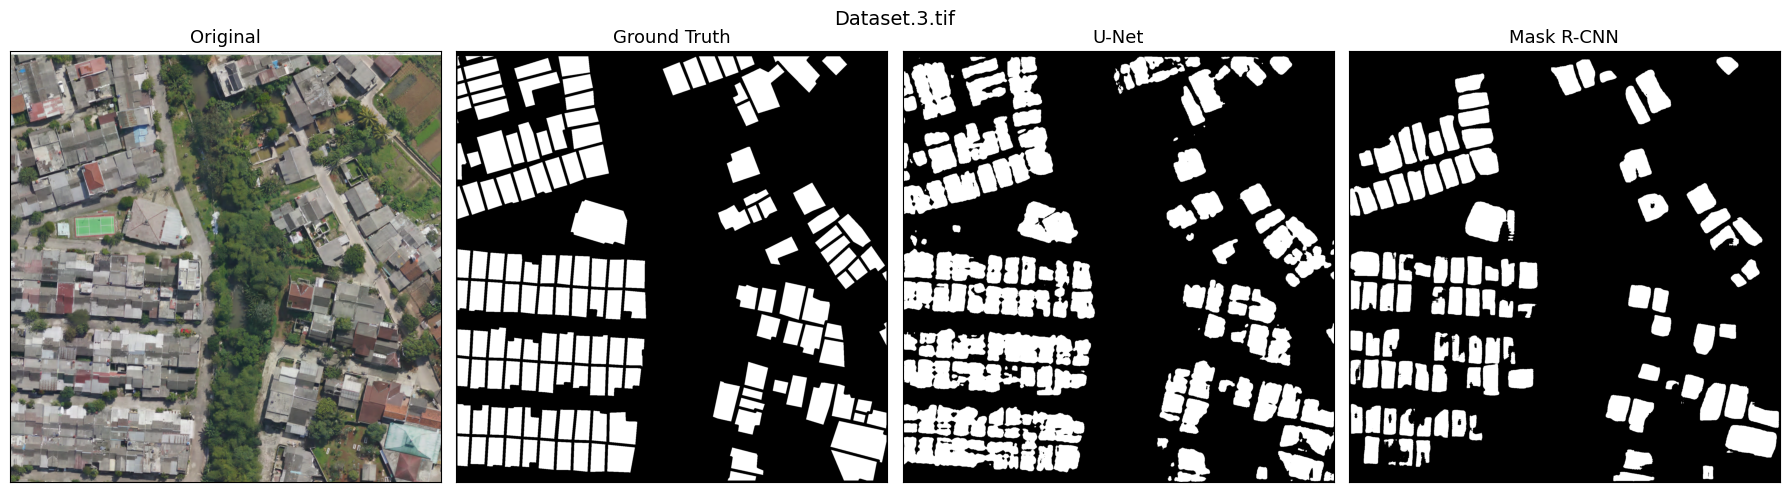

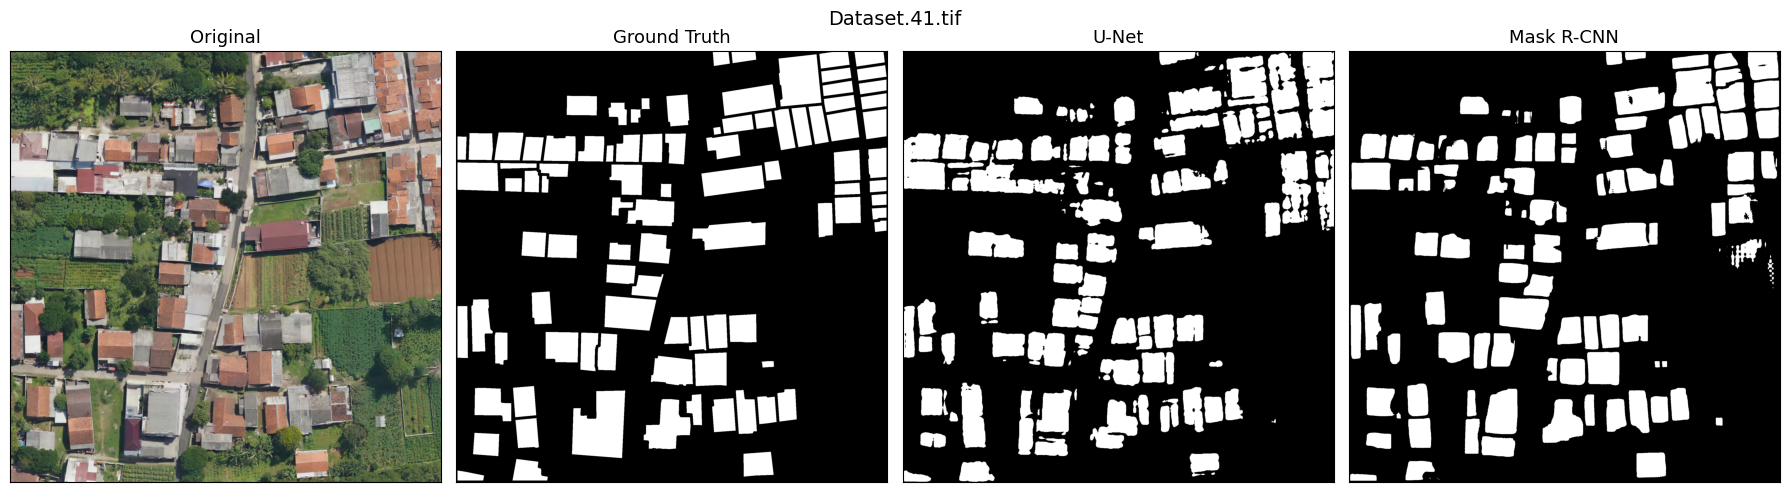

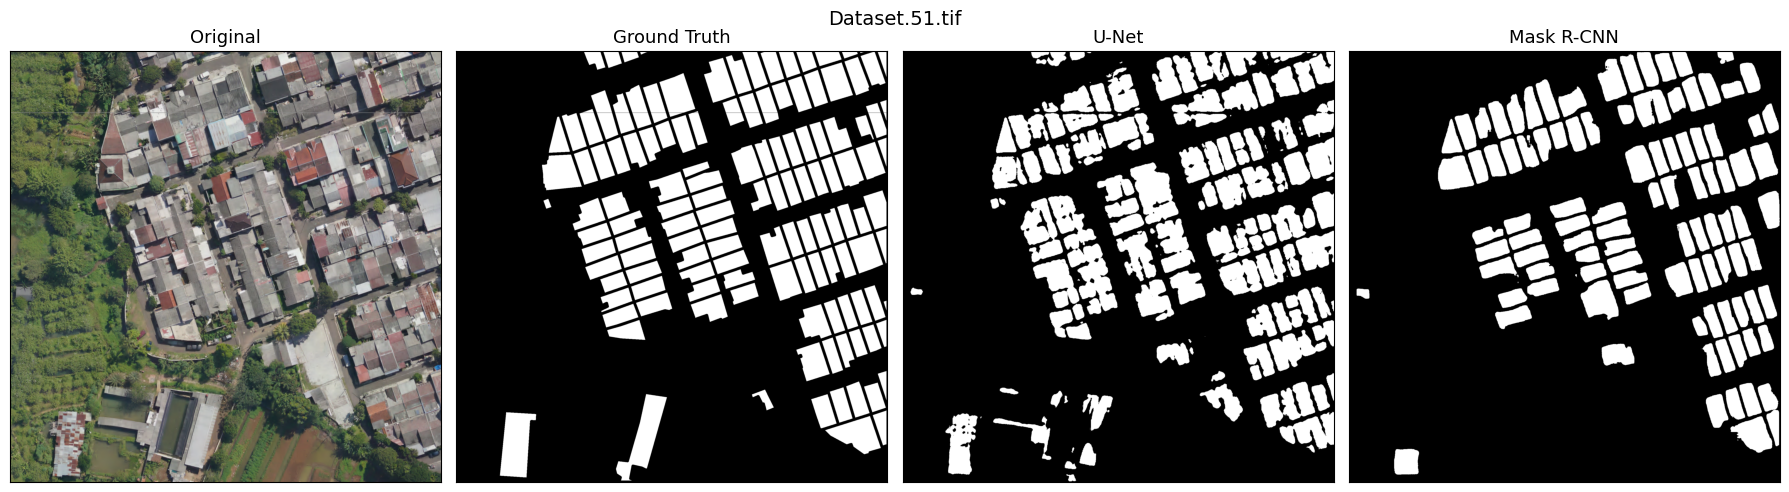

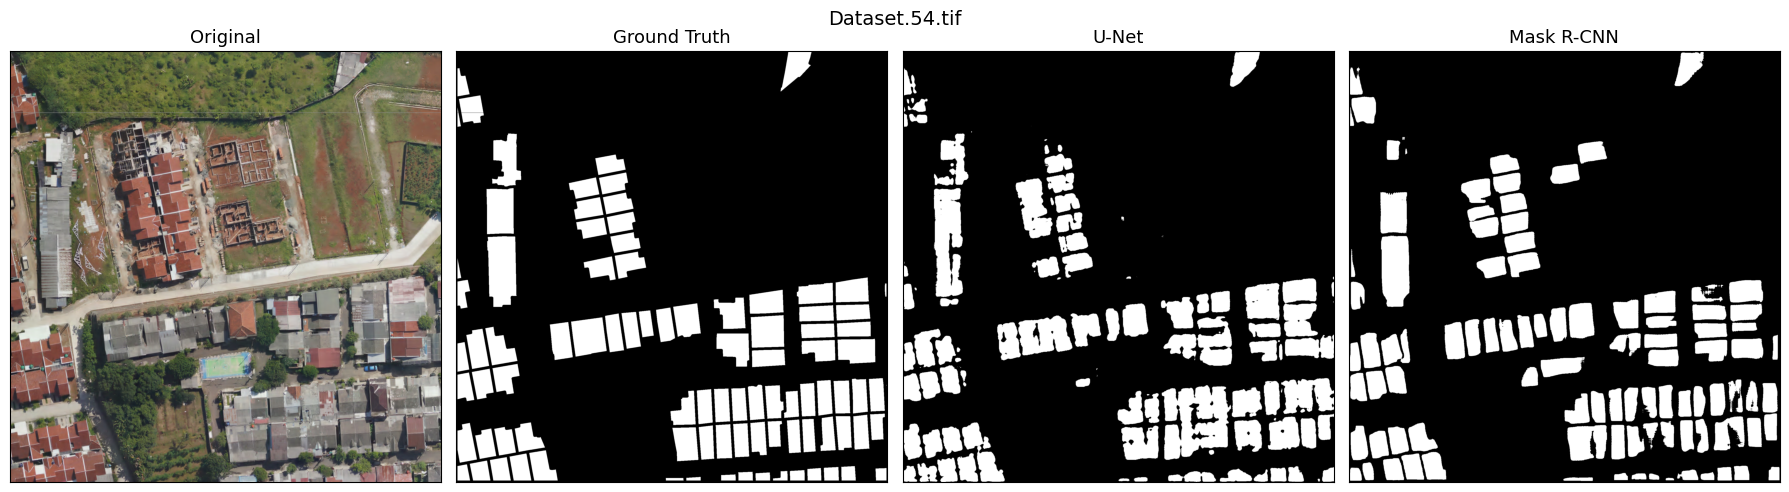

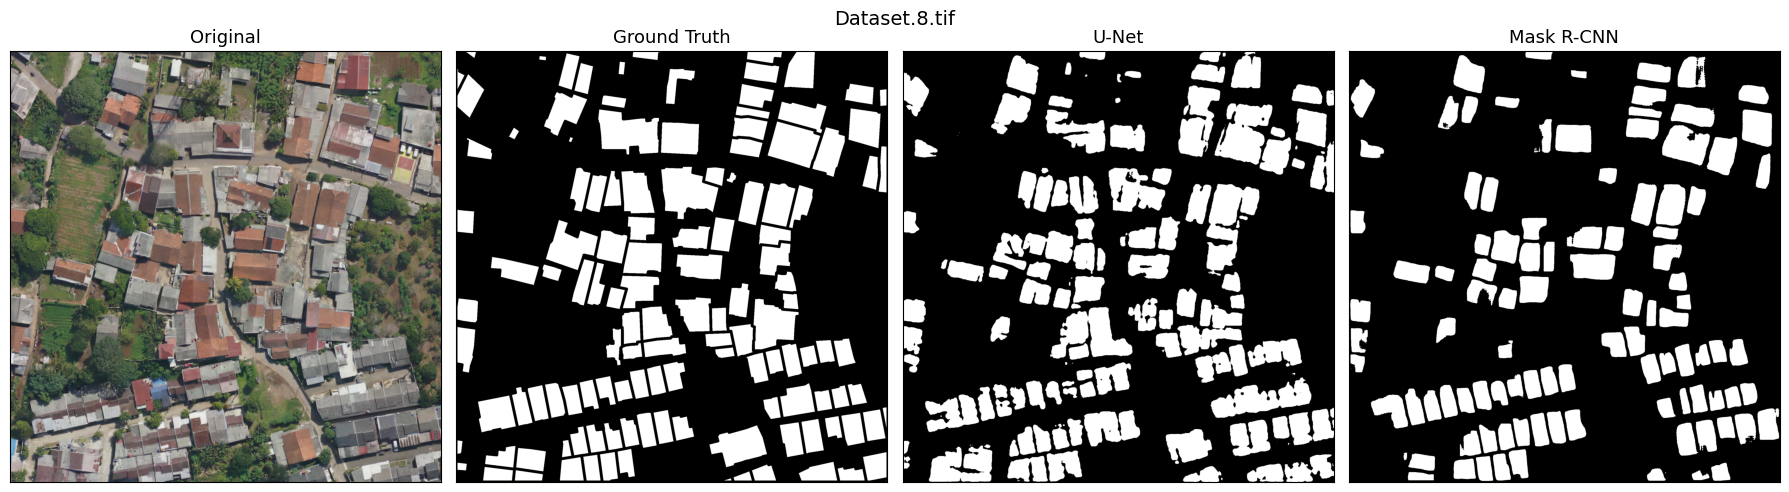

In [14]:
for filename in sorted(os.listdir(image_dir)):
    if not filename.endswith('.tif'):
        continue

    base_name = os.path.splitext(filename)[0]
    image_path = os.path.join(image_dir, filename)
    gt_path = os.path.join(gt_dir, filename)
    unet_path = os.path.join(unet_dir, f"{base_name}_pred_mask.tif")
    rcnn_path = os.path.join(rcnn_dir, f"{base_name}_predicted.tif")

    original = load_tif(image_path)
    gt = load_tif(gt_path)
    unet = load_tif(unet_path)
    rcnn = load_tif(rcnn_path)

    visualize_and_save(filename, original, gt, unet, rcnn)